In [8]:
import pandas as pd
df = pd.read_csv(r"C:/Major Project/Python/IT.csv",
                 index_col='year', parse_dates=True)

df = df.dropna()
print('Shape of data', df.shape)
df.head()
df


Shape of data (20, 1)


,noOfPublications
year,
2005-01-01,15.0
2006-01-01,2.0
2007-01-01,0.0
2008-01-01,1.0
2009-01-01,2.0
2010-01-01,12.0
2011-01-01,17.0
2012-01-01,21.0
2013-01-01,11.0


<Axes: xlabel='year'>

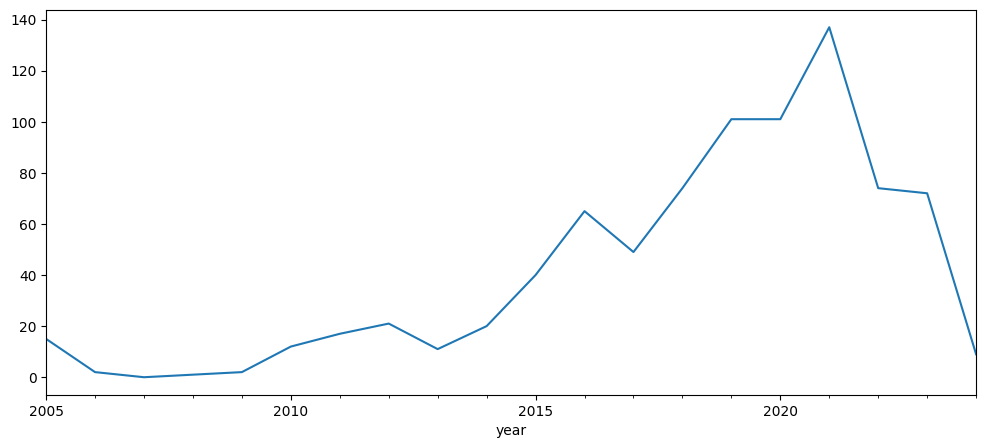

In [10]:
df['noOfPublications'].plot(figsize=(12,5))

In [13]:
from statsmodels.tsa.stattools import adfuller

data_diff = df.diff().dropna()
dftest = adfuller(data_diff["noOfPublications"], autolag = 'AIC')
while dftest[1]>=0.05:
    data_diff = data_diff.diff().dropna()
    dftest = adfuller(data_diff["noOfPublications"], autolag = 'AIC')




In [14]:
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(data_diff['noOfPublications'])

1. ADF :  -9.80801657153344
2. P-Value :  5.75633575339809e-17
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 17
5. Critical Values :
	 1% :  -3.889265672705068
	 5% :  -3.0543579727254224
	 10% :  -2.66698384083045


In [16]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['noOfPublications'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=182.991, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=181.010, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=182.624, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=182.822, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=179.013, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=182.999, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.405 seconds


In [18]:
print(df.shape)
train=df.iloc[:16]
test=df.iloc[16:]
print(train.shape,test.shape)

(20, 1)
(16, 1) (4, 1)


In [20]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['noOfPublications'],order=(0,1,0))
model=model.fit()
model.summary()

c:\python 310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\python 310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\python 310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       noOfPublications   No. Observations:                   16
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -61.344
Date:                Mon, 18 Mar 2024   AIC                            124.689
Time:                        19:47:22   BIC                            125.397
Sample:                    01-01-2005   HQIC                           124.681
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       208.8055     89.926      2.322      0.020      32.554     385.057
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.67
Prob(Q):                              0.91   Prob(JB):                         0.72
Heteroskedasticity (H):               8.13   Skew:                             0.15
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\python 310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='year'>

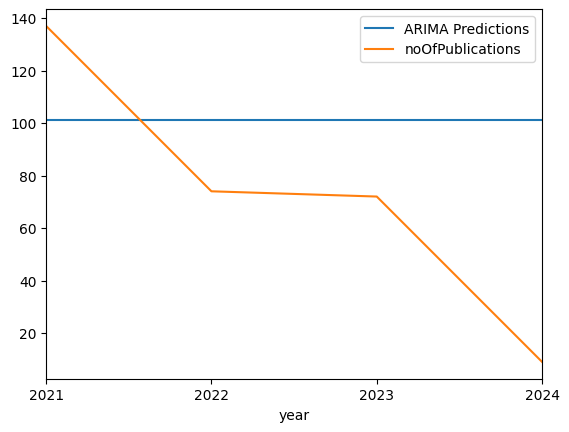

In [21]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['noOfPublications'].plot(legend=True)

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['noOfPublications'].mean()
rmse=sqrt(mean_squared_error(pred,test['noOfPublications']))
print(rmse)

53.22123636294069
